In [1]:
# Video 4

# Read in dataset
quality = read.csv("quality.csv")

In [2]:
# Look at structure
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [3]:
# Table outcome
table(quality$PoorCare)


 0  1 
98 33 

In [4]:
# Baseline accuracy
98/131

[1] 0.7480916

In [5]:
# Install and load caTools package
#install.packages("caTools")
library(caTools)

In [6]:
# Randomly split data
set.seed(88)
split = sample.split(quality$PoorCare, SplitRatio = 0.75)
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [7]:
# Create training and testing sets
qualityTrain = subset(quality, split == TRUE)
qualityTest = subset(quality, split == FALSE)

In [8]:
# Logistic Regression Model
QualityLog = glm(PoorCare ~ OfficeVisits + Narcotics, data=qualityTrain, family=binomial)
summary(QualityLog)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


In [9]:
# Make predictions on training set
predictTrain = predict(QualityLog, type="response")

In [10]:
# Analyze predictions
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11912 0.15967 0.25253 0.26765 0.98456 

In [11]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

In [12]:
Model = glm(PoorCare ~ StartedOnCombination + ProviderCount, data=qualityTrain, family=binomial)

In [13]:
summary(Model)


Call:
glm(formula = PoorCare ~ StartedOnCombination + ProviderCount, 
    family = binomial, data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.61826  -0.72782  -0.64555  -0.08407   1.94662  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.00097    0.55097  -3.632 0.000282 ***
StartedOnCombinationTRUE  1.95230    1.22342   1.596 0.110541    
ProviderCount             0.03366    0.01983   1.697 0.089706 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.89  on 98  degrees of freedom
Residual deviance: 104.37  on 96  degrees of freedom
AIC: 110.37

Number of Fisher Scoring iterations: 4


In [14]:
# Video 5

# Confusion matrix for threshold of 0.5
table(qualityTrain$PoorCare, predictTrain > 0.5)


   
    FALSE TRUE
  0    70    4
  1    15   10

In [15]:
# Sensitivity and specificity
10/25
70/74

[1] 0.4

[1] 0.9459459

In [16]:
# Confusion matrix for threshold of 0.7
table(qualityTrain$PoorCare, predictTrain > 0.7)

   
    FALSE TRUE
  0    73    1
  1    17    8

In [17]:
# Sensitivity and specificity
8/25
73/74

[1] 0.32

[1] 0.9864865

In [18]:
# Confusion matrix for threshold of 0.2
table(qualityTrain$PoorCare, predictTrain > 0.2)

   
    FALSE TRUE
  0    54   20
  1     9   16

In [19]:
# Sensitivity and specificity
16/25
54/74

[1] 0.64

[1] 0.7297297

In [20]:
# Video 6

# Install and load ROCR package
#install.packages("ROCR")
library(ROCR)

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [21]:
# Prediction function
ROCRpred = prediction(predictTrain, qualityTrain$PoorCare)

In [22]:
# Performance function
ROCRperf = performance(ROCRpred, "tpr", "fpr")

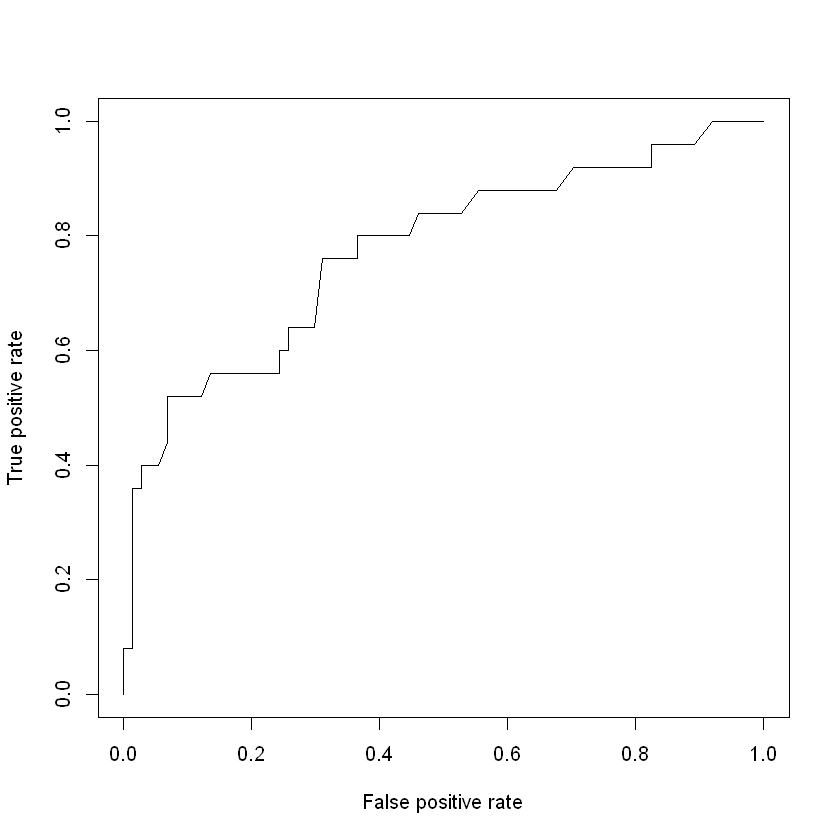

In [23]:
# Plot ROC curve
plot(ROCRperf)

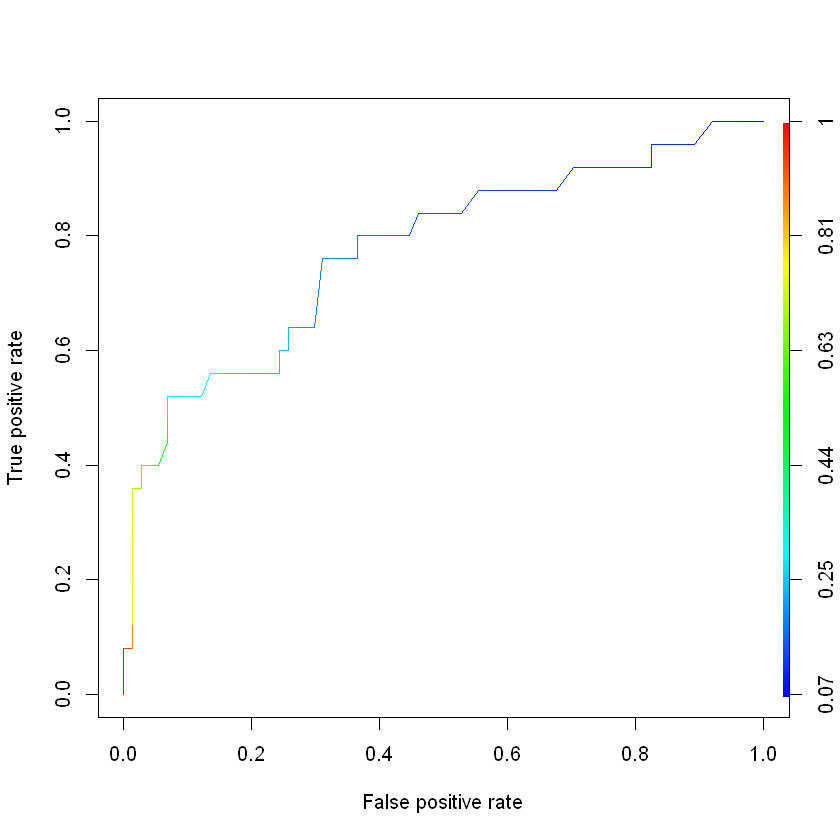

In [24]:
# Add colors
plot(ROCRperf, colorize=TRUE)

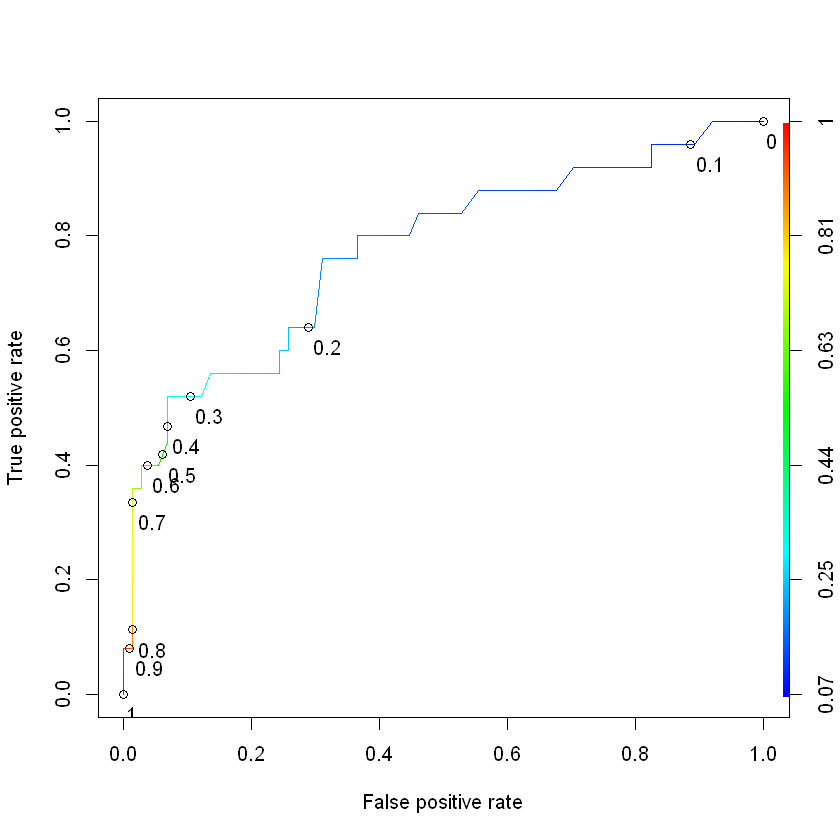

In [25]:
# Add threshold labels 
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))